In [1]:
import numpy as np
import pandas as pd
import re
import string
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import warnings
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\javed\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\javed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\javed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Load the dataset
df = pd.read_csv('bitcoin_posts.csv')



In [3]:
df

,post_id,title,selftext,url,author,score,publish_date,num_of_comments,permalink,flair
0,7g9cd3,"It's official! 1 Bitcoin = $10,000 USD",NaN,https://v.redd.it/e7io27rdgt001,LeeWallis,48611,2017-11-29 06:55:24,4417,/r/Bitcoin/comments/7g9cd3/its_official_1_bitc...,<praw.models.reddit.submission.SubmissionFlair...
1,7v438b,The last 3 months in 47 seconds.,NaN,https://v.redd.it/typ8fdslz3e01,Tricky_Troll,48541,2018-02-04 08:12:03,761,/r/Bitcoin/comments/7v438b/the_last_3_months_i...,<praw.models.reddit.submission.SubmissionFlair...
2,lfb3mm,Tesla buys $1.5b in Bitcoin and is looking to ...,NaN,https://v.redd.it/gazga81l29g61,AlphaGrayWolf,45540,2021-02-08 18:18:45,2864,/r/Bitcoin/comments/lfb3mm/tesla_buys_15b_in_b...,<praw.models.reddit.submission.SubmissionFlair...
3,7fkqh5,It's over 9000!!!,NaN,https://i.imgur.com/jyoZGyW.gifv,wolfwolfz,42461,2017-11-26 10:25:02,3066,/r/Bitcoin/comments/7fkqh5/its_over_9000/,<praw.models.reddit.submission.SubmissionFlair...
4,7olruz,Everyone who's trading BTC right now,NaN,http://cdn.mutually.com/wp-content/uploads/201...,NaN,42082,2018-01-07 02:08:56,761,/r/Bitcoin/comments/7olruz/everyone_whos_tradi...,<praw.models.reddit.submission.SubmissionFlair...
...,...,...,...,...,...,...,...,...,...,...
986,x3bjkm,You can mine bitcoin on a Gameboy,NaN,https://i.redd.it/fkszxlk6u9l91.jpg,KAX1107,3055,2022-09-01 21:39:26,370,/r/Bitcoin/comments/x3bjkm/you_can_mine_bitcoi...,<praw.models.reddit.submission.SubmissionFlair...
987,hpxa9g,Central banks doing what they do best.,NaN,https://i.redd.it/vns3475mega51.png,spookiestevie,3052,2020-07-12 22:03:49,331,/r/Bitcoin/comments/hpxa9g/central_banks_doing...,<praw.models.reddit.submission.SubmissionFlair...
988,1y9s62,Bitcoin takes a walk with Dogecoin,NaN,http://imgur.com/J2L64cX,james_otter,3058,2014-02-19 01:45:57,495,/r/Bitcoin/comments/1y9s62/bitcoin_takes_a_wal...,<praw.models.reddit.submission.SubmissionFlair...
989,ls3udq,"Cathie Wood Ark CEO: Bitcoin is the ""Best Hedg...",NaN,https://youtu.be/4GXd_XD6ivM,Fiach_Dubh,3051,2021-02-25 16:14:46,405,/r/Bitcoin/comments/ls3udq/cathie_wood_ark_ceo...,<praw.models.reddit.submission.SubmissionFlair...


In [4]:
# Select only the desired columns
df= df[['title', 'selftext', 'publish_date', 'score', 'num_of_comments']]

In [5]:
# Convert 'publish_date' to datetime and remove the time part
df['publish_date'] = pd.to_datetime(df['publish_date']).dt.date

#Set 'publish_date' as the index
df.set_index('publish_date', inplace=True)


In [6]:
# Sort the DataFrame by 'publish_date' in ascending order
df.sort_values(by='publish_date', inplace=True)

In [7]:
df

,title,selftext,score,num_of_comments
publish_date,,,,
2013-11-20,I’m one of the Senators attending today's U.S....,NaN,3187,832
2013-11-25,"I was bored so I animated the ""Bitcoin Accepte...",NaN,3198,282
2014-02-14,on r/bitcoin right now,NaN,3520,763
2014-02-19,Bitcoin takes a walk with Dogecoin,NaN,3058,495
2014-02-26,Open Letter to Michael Casey - WSJ reporter wh...,"Hello Mr. Casey,\n\nI read your WSJ article to...",3460,1414
...,...,...,...,...
2024-04-13,Literally... 😅,NaN,3118,191
2024-04-18,Halving,For us not to forget,3623,388
2024-04-20,Halving Status = Complete,NaN,3195,305


In [8]:
# Calculate the missing values and fill them with a space
df.fillna(' ', inplace=True)

In [9]:
# Merge the 'title' and 'selftext' columns with a single space between them
df['text'] = df['title'] + ' ' + df['selftext']

In [10]:

# Drop the original 'title' and 'selftext' columns
df.drop(columns=['title', 'selftext'], inplace=True)

In [11]:
df

,score,num_of_comments,text
publish_date,,,
2013-11-20,3187,832,I’m one of the Senators attending today's U.S....
2013-11-25,3198,282,"I was bored so I animated the ""Bitcoin Accepte..."
2014-02-14,3520,763,on r/bitcoin right now
2014-02-19,3058,495,Bitcoin takes a walk with Dogecoin
2014-02-26,3460,1414,Open Letter to Michael Casey - WSJ reporter wh...
...,...,...,...
2024-04-13,3118,191,Literally... 😅
2024-04-18,3623,388,Halving For us not to forget
2024-04-20,3195,305,Halving Status = Complete


Next, we sort by score to see what are the top 10 posts with the highest impact and/or number of comments.

In [12]:
df.sort_values(by=['score'], ascending=False).head(10)

,score,num_of_comments,text
publish_date,,,
2017-11-29,48611,4417,"It's official! 1 Bitcoin = $10,000 USD"
2018-02-04,48541,761,The last 3 months in 47 seconds.
2021-02-08,45540,2864,Tesla buys $1.5b in Bitcoin and is looking to ...
2017-11-26,42461,3066,It's over 9000!!!
2018-01-07,42082,761,Everyone who's trading BTC right now
2021-01-28,39992,1545,Robinhood just blocked several stocks from bei...
2019-07-24,36863,566,"Quick, upvote this to confuse everyone into th..."
2017-11-30,29357,1202,I hope James is doing well
2017-12-13,28083,1294,Nothing can increase by that much and still be...


# Text Preprocessing

In [13]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

def contx_to_exp(text):
  for key in apostrophe_dict:
    value = apostrophe_dict[key]
    text = text.replace(key, value)
    return text

In [14]:
# Emotion detection by different symbols
emotion_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

def emotion_check(text):
  for key in emotion_dict:
    value = emotion_dict[key]
    text = text.replace(key, value)
    return text


In [15]:
# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove website links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    
    # Remove newline characters
    text = text.replace('\n', ' ')
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

#removes pattern in the input text
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt.lower()


In [17]:
#removing the twitter handles @user
df['text'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")
#using above functions
df['text'] = df['text'].apply(lambda x : preprocess_text(x))
df['text'] = df['text'].apply(lambda x : contx_to_exp(x))
df['text'] = df['text'].apply(lambda x : emotion_check(x))

#removing special characters, numbers and punctuations
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ")


df['text'] = df['text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

# Removing every thing other than text
df['text'] = df['text'].apply( lambda x: re.sub(r'[^\w\s]',' ',x))  # Replacing Punctuations with space
df['text'] = df['text'].apply( lambda x: re.sub(r'[^a-zA-Z]', ' ', x)) # Raplacing all the things with space other than text
df['text'] = df['text'].apply( lambda x: re.sub(r"\s+"," ", x)) # Removing extra spaces

#individual words as tokens
tokenized_text = df['text'].apply(lambda x: x.split())

#stem the words

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

tokenized_text = tokenized_text.apply(lambda sentence: [lemmatizer.lemmatize(stemmer.stem(word)) for word in sentence])


#combine words into single sentence 
for i in range(len(tokenized_text)):
    tokenized_text[i] = " ".join(tokenized_text[i])
    

    
df['text'] = tokenized_text
df.head()



,score,num_of_comments,text
publish_date,,,
2013-11-20,3187,832,senat attend today senat bank committe hear re...
2013-11-25,3198,282,bore anim bitcoin accept here imag
2014-02-14,3520,763,bitcoin right
2014-02-19,3058,495,bitcoin take walk dogecoin
2014-02-26,3460,1414,open letter michael casey report butcher comme...


In [18]:
# Generate word cloud
text_combined = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

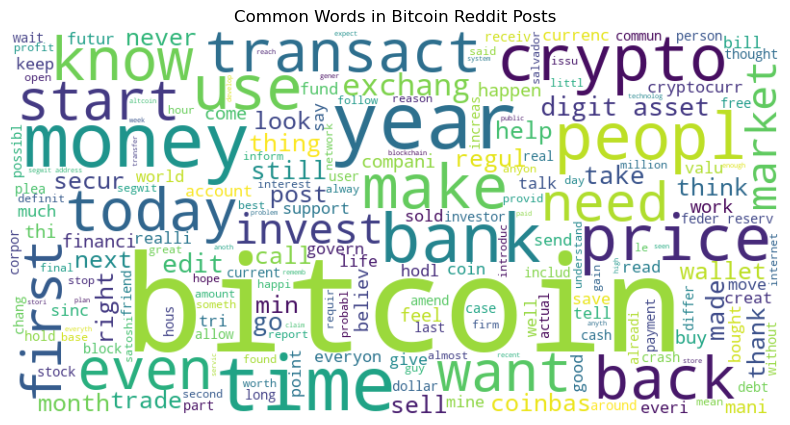

In [19]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Bitcoin Reddit Posts')
plt.show()

In [20]:
# Function to get sentiment polarity and subjectivity using TextBlob
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity
df['red_polarity'], df['red_subjectivity'] = zip(*df['text'].apply(get_textblob_sentiment))


In [21]:
# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# Function to get sentiment scores
def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound'], scores['neg'], scores['neu'], scores['pos']



In [22]:
# Apply sentiment analysis to the 'merged_text' column
df['red_compound'], df['red_negative'], df['red_neutral'], df['red_positive'] = zip(*df['text'].apply(get_sentiment_scores))

In [23]:
df.head()

,score,num_of_comments,text,red_polarity,red_subjectivity,red_compound,red_negative,red_neutral,red_positive
publish_date,,,,,,,,,
2013-11-20,3187,832,senat attend today senat bank committe hear re...,0.000000,0.000000,0.3612,0.000,0.815,0.185
2013-11-25,3198,282,bore anim bitcoin accept here imag,0.000000,0.000000,0.1531,0.233,0.465,0.302
2014-02-14,3520,763,bitcoin right,0.285714,0.535714,0.0000,0.000,1.000,0.000
2014-02-19,3058,495,bitcoin take walk dogecoin,0.000000,0.000000,0.0000,0.000,1.000,0.000
2014-02-26,3460,1414,open letter michael casey report butcher comme...,-0.028205,0.480769,0.7783,0.072,0.823,0.105


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 2013-11-20 to 2024-05-01
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   score             991 non-null    int64  
 1   num_of_comments   991 non-null    int64  
 2   text              991 non-null    object 
 3   red_polarity      991 non-null    float64
 4   red_subjectivity  991 non-null    float64
 5   red_compound      991 non-null    float64
 6   red_negative      991 non-null    float64
 7   red_neutral       991 non-null    float64
 8   red_positive      991 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 109.7+ KB


# To find sentiments of reddit data

In [35]:
# create a function get the sentiment text
def getSentiment(scores):
    if scores < 0:
        return "negative"
    elif scores == 0:
        return "neutral"
    else:
        return "positive"

In [36]:
# create a column to store the text sentiment
df['red_sent'] = df['red_polarity'].apply(getSentiment)
df.head()

,score,num_of_comments,text,red_polarity,red_subjectivity,red_compound,red_negative,red_neutral,red_positive,red_sent
publish_date,,,,,,,,,,
2013-11-20,3187,832,senat attend today senat bank committe hear re...,0.000000,0.000000,0.3612,0.000,0.815,0.185,neutral
2013-11-25,3198,282,bore anim bitcoin accept here imag,0.000000,0.000000,0.1531,0.233,0.465,0.302,neutral
2014-02-14,3520,763,bitcoin right,0.285714,0.535714,0.0000,0.000,1.000,0.000,positive
2014-02-19,3058,495,bitcoin take walk dogecoin,0.000000,0.000000,0.0000,0.000,1.000,0.000,neutral
2014-02-26,3460,1414,open letter michael casey report butcher comme...,-0.028205,0.480769,0.7783,0.072,0.823,0.105,negative


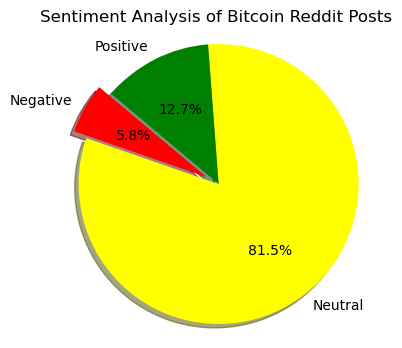

In [37]:
# Calculate the average percentages for the pie chart
average_negative = df['red_negative'].mean()
average_neutral = df['red_neutral'].mean()
average_positive = df['red_positive'].mean()

# Create a pie chart
labels = ['Negative', 'Neutral', 'Positive']
sizes = [average_negative, average_neutral, average_positive]
colors = ['red', 'yellow', 'green']
explode = (0.1, 0, 0)  # explode the 1st slice

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Analysis of Bitcoin Reddit Posts')
plt.show()

In [27]:
# Delete the 'text' column
df = df.drop(columns=['text','red_sent'])

In [28]:
# Save the resulting DataFrame to a new CSV file
df.to_csv('reddit_sent_score.csv')